In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import lxml

In [2]:
# 解决pyplot绘图中文乱码问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']= False

In [3]:
job_df = pd.read_csv("LG.csv")

In [4]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
company            2039 non-null object
job_name           2039 non-null object
salary             2039 non-null object
city               2039 non-null object
work_year          2039 non-null object
education          2039 non-null object
job_description    2039 non-null object
dtypes: object(7)
memory usage: 111.6+ KB


In [5]:
job_df.head()

,company,job_name,salary,city,work_year,education,job_description
0,先贸网络科技技术部招聘,大数据分析工程师,15k-18k,广州,经验1-3年,本科及以上,<div>\n <p>职位描述:</p>\n<p>1、 根据业务需求，运用数据...
1,美兴中国创新科技部招聘,数据分析师 Data Analyst,7k-14k,成都,经验3-5年,本科及以上,"<div>\n <p class="""">As a member of the ..."
2,今日头条招聘,数据仓库与数据分析工程师,25k-40k,北京,经验3-5年,本科及以上,<div>\n 职位职责：\n<br>1、负责数据仓库架构设计、建模和ETL开...
3,美云智数数据云事业部招聘,高级数据分析师（用户画像...,15k-30k,佛山,经验3-5年,本科及以上,<div>\n <p>岗位职责：</p>\n<p>1、负责用户画像的需求分析和...
4,美甲帮数据部招聘,数据分析师,10k-15k,广州,经验3-5年,本科及以上,<div>\n <p>岗位职责：<br>1、负责项目的日常数据监控。包括每日、...


In [6]:
# description = re.compile(r"[^\x00-\x7F]+\ *(?:[^\x00-\x7F]| )*", re.IGNORECASE)
description = re.compile(r"(<script(\s|\S)*?<\/script>)|(<style(\s|\S)*?<\/style>)|(<!--(\s|\S)*?-->)|(<\/?(\s|\S)*?>)")
# description = re.compile(r'1.*。')

In [7]:
def remove_tags(description):
    tags = ['<p>', '</p>', '<div>', '</div>','<br>', '<p class="">']
    for tag in tags:
        description = description.replace(tag, "").strip()
    return description

In [8]:
job_df["job_description"] = job_df["job_description"].apply(remove_tags)

In [9]:
# get words list
my_words = [word for word in job_df["job_description"]]
len(my_words)

2039

In [10]:
import jieba
import jieba.analyse
seg_list = jieba.cut(job_df.job_description[0], cut_all=False)
print("/".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yijig\AppData\Local\Temp\jieba.cache
Loading model cost 0.981 seconds.
Prefix dict has been built succesfully.


职位/描述/:/
/1/、/ /根据/业务/需求/，/运用/数据挖掘/技术/，/开发/、/验证/、/监控/及/维护/贷前/和/贷后/评估/模型/；/
/2/、/ /能/利用/数据分析/手段/，/对/多种/数据源/进行/深度/诊断/性/组合分析/、/挖掘/、/深度/分析/，/并/通过/分析/潜在/业务/机会/给出/建议/；/
/3/、/ /应用/机器/学习/、/文本/挖掘/等/技术/，/对/海量/数据/进行/挖掘/，/发现/其/潜在/关系/，/研发/符合/客户/的/大/数据/产品/；/
/4/、/ /配合/业务部门/给予/数据/支持/，/帮助/业务部门/优化/运营/服务/，/设计/符合/用户/个性化/需求/的/产品/；/对/欺诈/风险/、/信用风险/进行/量化/分析/，/为/信贷政策/的/制定/和/调整/、/贷后/管理/、/催收/管理/等/提供/决策依据/
/5/、/ /通过/大/数据挖掘/用户/群体行为/和/属性/特征/，/帮助/业务/单元/更好/的/理解/客户/需求/；/
/6/、/ /参与/公司/大/数据/平台/的/规划/与/建设/。/
/
/任职/资格/要求/：/
/1/、/ /本科/及/以上学历/，/ /金融/、/数学/、/统计/、/计算机/等/相关/专业/优先/；/
/2/、/ /具备/大/数据/的/处理/能力/，/有/较/强/的/逻辑思维/能力/、/数据挖掘/和/分析/能力/，/熟练/使用/ /SPSS///R///SAS/ /等/数据分析/工具/，/至少/熟悉/一种/开源/数据挖掘/工具/；/
/3/、/ /良好/的/数据/敏感度/,/能/从/海量/数据/提炼/核心/结果/；/有/丰富/的/数据分析/、/挖掘/、/清洗/和/建模/的/经验/；/
/4/、/ /至少/对/聚类/、/决策树/、/逻辑/回归/、/神经网络/、/随机/森林/等/算法/的/其中/一种/有过/研究/；/
/5/、/ /具备/良好/的/抗压/能力/、/沟通/能力/、/逻辑思维/能力/，/有/独立/开展/分析/研究/项目/经验/，/具有/强烈/的/责任心/，/具备/良好/的/团队/合作/精神/，/积极主动/，/能/承受/较大/的/工作/压力/；/
/
/6/、/有/1/ /年/以上/供应链/金融/、/小微/企业/金融/、/消费/金融/等/领域/的/大/数据分析/和/建模/经验/；/有/

In [11]:
def count_tags(words):
    tags = {}
    for word in my_words:
        for tag in jieba.analyse.tfidf(word):
            if tag not in tags:
                tags[tag] = 1
            else:
                tags[tag] += 1
    return tags

In [12]:
jieba.analyse.set_stop_words(stop_words_path="stop_words.txt")
my_tags = count_tags(my_words)
sorted(my_tags.items(), key=lambda a: a[1], reverse=True)[:50]

[('SQL', 960),
 ('SAS', 519),
 ('Python', 482),
 ('SPSS', 464),
 ('Excel', 419),
 ('统计学', 394),
 ('团队', 358),
 ('逻辑思维', 347),
 ('沟通', 320),
 ('互联网', 286),
 ('模型', 275),
 ('数据库', 248),
 ('PPT', 248),
 ('统计', 244),
 ('算法', 240),
 ('数据模型', 237),
 ('报告', 235),
 ('敏感度', 225),
 ('统计分析', 222),
 ('责任心', 215),
 ('业务部门', 214),
 ('海量', 208),
 ('工具', 208),
 ('excel', 203),
 ('python', 203),
 ('岗位', 195),
 ('报表', 193),
 ('指标体系', 192),
 ('项目', 179),
 ('提供', 176),
 ('监控', 174),
 ('Hadoop', 170),
 ('数据处理', 166),
 ('Hive', 165),
 ('软件', 161),
 ('抗压', 158),
 ('表达能力', 157),
 ('客户', 154),
 ('电商', 150),
 ('学习', 150),
 ('EXCEL', 149),
 ('sql', 149),
 ('BI', 148),
 ('hive', 148),
 ('数据仓库', 144),
 ('平台', 137),
 ('数据报表', 137),
 ('分析模型', 137),
 ('可视化', 132),
 ('行业', 130)]

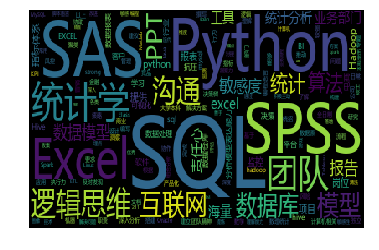

In [44]:
from wordcloud import WordCloud

word_cloud = WordCloud(font_path='C:\Windows\Fonts\Microsoft YaHei\msyh.ttc').fit_words(my_tags)
plt.imshow(word_cloud, aspect="auto")
plt.axis("off")
plt.show()